In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

from cleverhans.torch.attacks.projected_gradient_descent import (
    projected_gradient_descent,
)

import os
import numpy as np
import logging
import datetime
import matplotlib.pyplot as plt

In [2]:
def generate_adverasrial_examples(model, dataset, device='cpu', resize=None, early_stop=None):
    orig_dataset = []
    adv_dataset=[]
    if device:
        model = model.to(device)

    batch = 0
    for images, labels in dataset:
        print('Time: ', datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_%f"))
        print(f'batch: {batch+1}/{len(dataset)}')
        if device:
            images = images.to(device)[:25]
            labels = labels.to(device)[:25]

        adv_images = projected_gradient_descent(model, images, eps=0.1, eps_iter=0.01, nb_iter=10, norm=np.inf)
        if resize is not None:
            resize_transform = transforms.Resize(resize)
            adv_images = resize_transform(adv_images)
            images = resize_transform(images)

        adv_dataset.append([adv_images, labels])
        orig_dataset.append([images, labels])
        batch += 1

        if early_stop and batch == early_stop:
            break

    return orig_dataset, adv_dataset


In [3]:

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)


In [4]:

vgg16_pretrained_model = torch.load('final_models/vgg16_pretrained.pth', map_location=torch.device('cpu'))
resnet50_pretrained_model = torch.load('final_models/resnet50_pretrained.pth', map_location=torch.device('cpu'))
resnet101_pretrained_model = torch.load('final_models/resnet101_pretrained.pth', map_location=torch.device('cpu'))

In [5]:
orig_dataset, vgg16_adv_dataset = generate_adverasrial_examples(vgg16_pretrained_model, train_loader, early_stop=5)
orig_dataset, resnet50_adv_dataset = generate_adverasrial_examples(resnet50_pretrained_model, train_loader, early_stop=5)
orig_dataset, resnet101_adv_dataset = generate_adverasrial_examples(resnet101_pretrained_model, train_loader, early_stop=5)


Time:  2023_06_07_15_37_43_216233
batch: 1/469
Time:  2023_06_07_15_38_39_753038
batch: 2/469
Time:  2023_06_07_15_39_35_357768
batch: 3/469
Time:  2023_06_07_15_40_31_854474
batch: 4/469
Time:  2023_06_07_15_41_26_317118
batch: 5/469
Time:  2023_06_07_15_42_20_733231
batch: 1/469
Time:  2023_06_07_15_43_03_496893
batch: 2/469
Time:  2023_06_07_15_43_46_198758
batch: 3/469
Time:  2023_06_07_15_44_28_817474
batch: 4/469
Time:  2023_06_07_15_45_14_611647
batch: 5/469
Time:  2023_06_07_15_45_59_228473
batch: 1/469
Time:  2023_06_07_15_47_09_712252
batch: 2/469
Time:  2023_06_07_15_48_18_113581
batch: 3/469
Time:  2023_06_07_15_49_28_981302
batch: 4/469
Time:  2023_06_07_15_50_39_083787
batch: 5/469


In [49]:
orig_images = []
orig_labels = []
for images, labels in orig_dataset:
    for image in images:
        orig_images.append(np.transpose(image.detach().numpy(), axes=(1, 2, 0)))
    for label in labels:
        orig_labels.append(np.transpose(label.detach().numpy()))
    break
adv_images = []
adv_labels = []
for images, labels in resnet101_adv_dataset:
    for image in images:
        adv_images.append(np.transpose(image.detach().numpy(), axes=(1, 2, 0)))
    for label in labels:
        adv_labels.append(np.transpose(label.detach().numpy()))
    break


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


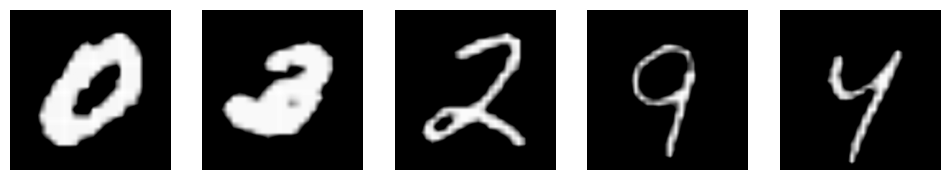

[array(0), array(3), array(2), array(9), array(4)]


In [50]:
plot_counts = 5
fig, axes = plt.subplots(1, plot_counts, figsize=(12, 8)) 
for index, img in enumerate(orig_images[:plot_counts]):
    print(img.shape)
    ax = axes[index]
    # Plot the image on the subplot
    ax.imshow(img)
    ax.axis('off')
plt.show()
print(orig_labels[:plot_counts])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


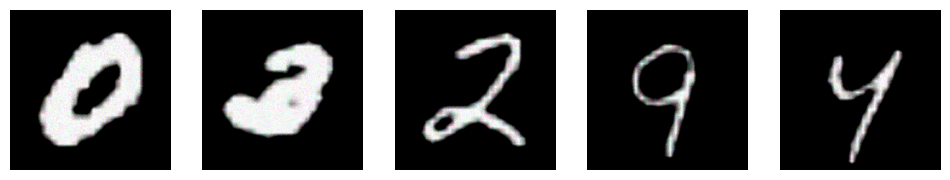

[array(0), array(3), array(2), array(9), array(4)]


In [51]:
plot_counts = 5
fig, axes = plt.subplots(1, plot_counts, figsize=(12, 8)) 
for index, img in enumerate(adv_images[:plot_counts]):
    print(img.shape)
    ax = axes[index]
    # Plot the image on the subplot
    ax.imshow(img)
    ax.axis('off')
plt.show()
print(adv_labels[:plot_counts])